# GRIP- THE SPARKS FOUNDATION
## DATA SCIENCE AND BUSINESS ANALYTICS

## Author: SHRUTHI  S





### TASK 1- Prediction using Supervised ML
### A linear regression task to predict the percentage of student based on number of study hours


In [161]:
#importing all libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [162]:
#reading the dataset
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Student dataset is imported")

Student dataset is imported


In [163]:
data.head(9)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81


In [164]:
#check for null values in the data
data.isnull==True

False

There are no null values in our data, so now we can work on it.

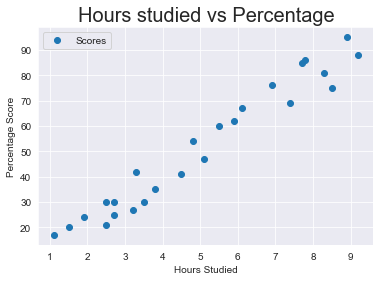

In [165]:
# Plotting the distribution of scores
sns.set_style('darkgrid')
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours studied vs Percentage', size=20)  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Training the model

In [166]:
#splitting X and y from the data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [167]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [168]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [169]:
#Training model by importing train_test_split function
X_train, X_test, Y_train, Y_test = train_test_split(X,y ,train_size=0.75, random_state=0)

In [170]:
#checking the shape(rows,columns) of data
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((18, 1), (7, 1), (18,), (7,))

In [171]:
#importing linearregression from sklearn and fitting it to model
lr = LinearRegression()
lr.fit(X_train, Y_train)
print('Training completed successfully')

Training completed successfully


# Regression Plot

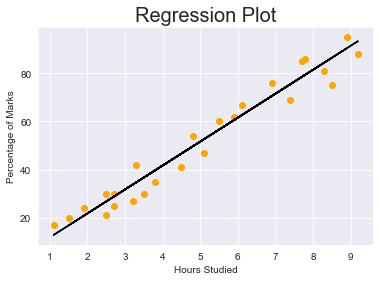

In [172]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.title('Regression Plot',size=20)
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage of Marks')  
plt.scatter(X, y,color='orange')
plt.plot(X, line,color='black');
plt.show()

In [173]:
print(data.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


The variables are positively correalted

# Predicting percentage of marks

In [174]:
print(X_test)
Y_pred= lr.predict(X_test)


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [175]:
#combining y_pred and X_test together and prediction is made
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Marks': [k for k in Y_pred]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [176]:
compare_scores = pd.DataFrame({'Actual scores': Y_test, 'Predicted scores': Y_pred})  
compare_scores

,Actual scores,Predicted scores
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


# Evaluating the model 

In [178]:
mean_absolute_error(Y_pred,Y_test)

4.130879918502486

The least value for error shows that the chances of wrong predictions of model are very less.

# What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [179]:
hours = [9.25]
answer = lr.predict([hours])
print("Predicted Score = {}".format(round(answer[0],3)))

Predicted Score = 93.893


According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.